In [1]:
from pylab import *
import pandas as pd
from timeit import default_timer as timer
from ImageAlgoKD import *
from tqdm import tqdm

%matplotlib inline
plt.style.use('classic')
plt.rc("figure",facecolor="w",figsize=(6,4))
plt.rc("font",size=10)
plt.rc("savefig",dpi=300)

In [2]:
# load data
Points = np.fromfile("../data/MNIST/MNIST_train_data.dat").reshape(-1,785)
Points = Points[:,0:-1]
Points = Points[:1000]
nPoints,kPoints = Points.shape
wPoints = np.ones(nPoints)

In [3]:
ia = ImageAlgoKD(MAXDISTANCE        = 1.5,
                 KERNAL_R           = 0.6,
                 KERNAL_R_NORM      = 0.4,
                 KERNAL_POWER       = 2.0,
                 DECISION_RHO_KAPPA = 4.0,
                 DECISION_NHD       = 0.6,
                 CONTINUITY_NHD     = 0.7)

In [6]:
#result = ia.run_ImageAlgoKD_numpy(Points,wPoints, ReturnDF = True)
result = ia.run_ImageAlgoKD_CUDA(Points,wPoints, ReturnDF = True)

# Visualize the Result

Text(0.5,1,'Decision Plot')

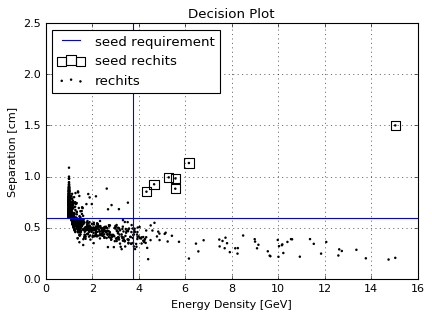

In [5]:
plt.scatter(result.rho[result.isseed],result.nhd[result.isseed],marker='s',
            s=70,edgecolor="k",color="None",label="seed rechits")
plt.scatter(result.rho, result.nhd, marker='.',edgecolor="None",color="k",label="rechits")
plt.axvline(ia.DECISION_RHO,color="b",label="seed requirement")
plt.axhline(ia.DECISION_NHD,color="b")

plt.xlabel("Energy Density [GeV]")
plt.ylabel("Separation [cm]")
plt.legend(loc="upper left",fontsize=12)
plt.xlim(-0)
plt.ylim(0,2.5)
plt.grid(True)
plt.title("Decision Plot",fontsize=12)

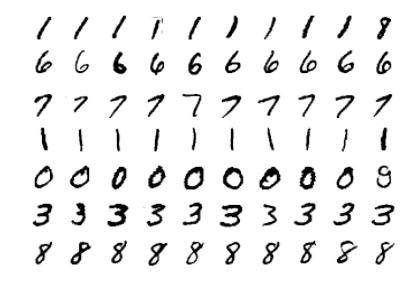

In [15]:
seeds = np.unique(result.cluster)
seeds = seeds[seeds>=0]
nrow = seeds.size
ncol = 10

i = 0
for icl in seeds:
    cl = Points[result.cluster==icl]
    for j in range(ncol):
        plt.subplot(nrow, ncol, i*ncol + j+1)
        img = cl[j].reshape(28,28).T
        plt.imshow(img,cmap="Greys")
        plt.axis('off')
    i = i+1